In [1]:
import numpy as np
import pandas as pd

from scipy.stats import norm

from src.series import ControlledInterventionSeries

In [10]:
"""
Forging some test data
"""
n = 100
trend = np.linspace(0, 10, n)
split = int(n / 2)

control_series = pd.Series(norm(loc=0, scale=1).rvs(n)) + trend
series = norm(loc=0, scale=1).rvs(n) + trend

series = pd.Series((series + 1) + np.concatenate([np.zeros(split), np.ones(n - split) * .5]))

experiment = ControlledInterventionSeries(
    series, control_series, split
)

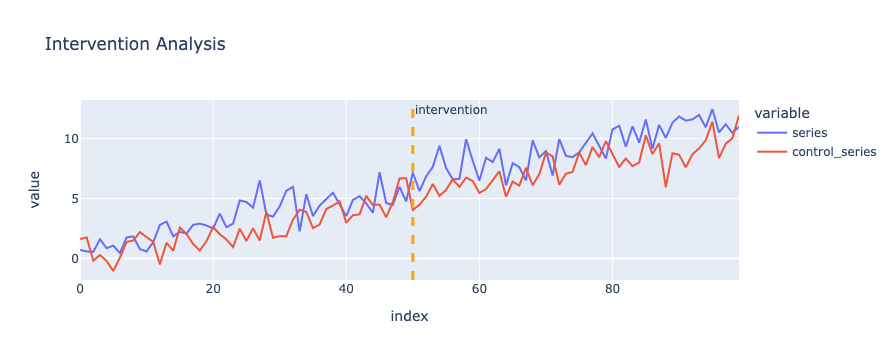

In [11]:
experiment.plot()

In [12]:
experiment.ttest_ind_from_stats()

Ttest_indResult(statistic=-2.3836627581799585, pvalue=0.019068053334329815)

In [13]:
experiment.report()


The mean difference of the series and control series before and after the intervention is
	Before: 0.9463422361578947, After: 1.6294442045064008.

The estiamted cumulative increment through the intervention based on the data from before the intervention is
	34.155098417425314

The p-value for significance of this results is
	0.019068053334329815.
        
